<a href="https://colab.research.google.com/github/rahiakela/feature-extraction-and-image-processing-for-computer-vision/blob/master/1-introduction/image_display_and_brightening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image display and brightening

In this notebook, we will display image and add brightness into the image.

It is used to visualize an image in different forms. It loads and displays an image, it prints the pixels’ values and it shows the image as a surface.

##Setup

In [23]:
from ImageUtilities import imageReadL, showImageL, createImageL, createImageF
from PrintUtilities import printImageRangeL
from PlotUtilities import plotColorSurface, plot3DColorHistogram

from PIL import Image

from timeit import itertools

%matplotlib inline

## Image display

-  **imageReadL** reads an image and stores the data in an array (a matrix) of grey level values.
- **printImageRangeL** to display the values of the pixels in matrix form.

In [18]:
image_name = "SmoothSquare.png"

# Read image into array
input_image, width, height = imageReadL(image_name)
# Show input image
outputImage = Image.fromarray(input_image, 'L')
outputImage

In [6]:
# Print pixel's values in an image range
printImageRangeL(input_image, [0, width-1], [0, height-1])



[ 255 255 255 255 254 253 253 254 255 255 255 255 ]
[ 255 255 249 239 231 229 229 231 239 249 255 255 ]
[ 255 248 227 199 179 171 171 179 199 227 248 255 ]
[ 255 239 199 101  70  58  58  70 101 199 239 255 ]
[ 254 231 179  70  32  20  20  32  70 179 231 254 ]
[ 253 229 171  58  20   9   9  20  58 171 229 253 ]
[ 253 229 171  58  20   9   9  20  58 171 229 253 ]
[ 254 231 179  70  32  20  20  32  70 179 231 254 ]
[ 255 239 199 101  70  58  58  70 101 199 239 255 ]
[ 255 248 227 199 179 171 171 179 199 227 248 255 ]
[ 255 255 249 239 231 229 229 231 239 249 255 255 ]
[ 255 255 255 255 254 253 253 254 255 255 255 255 ]


- **createImageF** creates an array of floats (floating point numbers), and its last parameter defines the number of floats per pixel.

In [7]:
# Create an image to store the z values for surface
outputZ = createImageF(width, height)
# Three float array to store colors of the surface
colorsRGB = createImageF(width, height, 3)

# Set surface and color values
for x in range(0, width):
    for y in range(0, height):
        pixel_value = float(input_image[y, x])
        outputZ[y, x] = 255 - pixel_value
        point_colour = float(input_image[y, x]) / 255.0
        colorsRGB[y, x] = [point_colour, point_colour, point_colour]

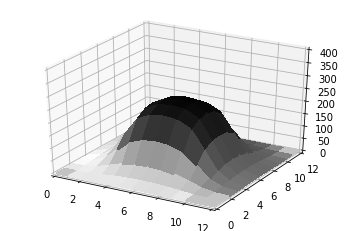

In [8]:
# Plot surface
plotColorSurface(outputZ, colorsRGB, [0, 400], 1)

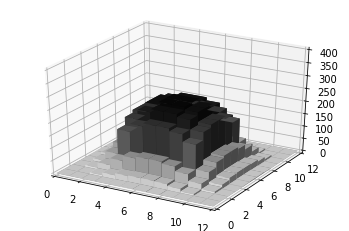

In [9]:
# Plot histogram
plot3DColorHistogram(outputZ, colorsRGB, [0, 400])

The arrays are filled by using the data in the input image in two nested loops. Notice that indentation is used to define the scope of each loop and that image data are accessed in `[row][column]` format.

## Image brightening

The function `createImageL` to create a grey level image that contains the
processed data. In addition to the name of the image, the script has two variables that are used as parameters. brightDelta defines an amount that is added to the input pixel to produce an output pixel, and printRange defines a range of pixels that are printed out.

However, we defines the two nested loops in a single line by using the function `itertools.product` imported from `timeit`. Both the iterative and the nested loops have the same functionality.

We use the iterator to perform nested loops to reduce indentation and keep
the code clearer.

Inside the loop, the output pixels $q(x, y)$ result from adding $\vartriangle_{bright}$ to the input pixels $p(x, y)$ as

$$q(x, y) = p(x, y) + \vartriangle_{bright}$$

This is computed as the value of the input pixel plus the value of brightDelta.

In [24]:
image_name = "Zebra.png"

bright_delta = 80
print_range = [0, 10]

# Read image into array
input_image, width, height = imageReadL(image_name)

# Output image
output_image = createImageL(width, height)

# Set the pixels in the output image
for x, y in itertools.product(range(0, width), range(0, height)):
    out_value = int(input_image[y, x]) + bright_delta
    if out_value < 255:
        output_image[y, x] = out_value
    else:
        output_image[y, x] = 255

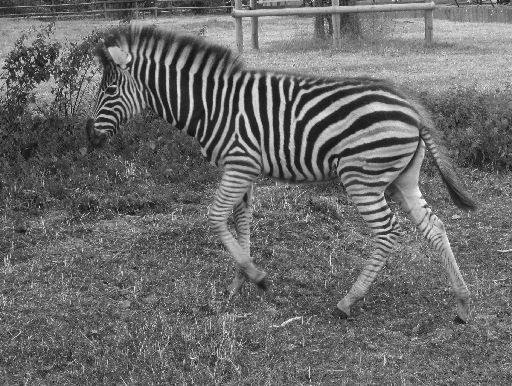

In [25]:
# Show images before brightness
Image.fromarray(input_image, 'L')

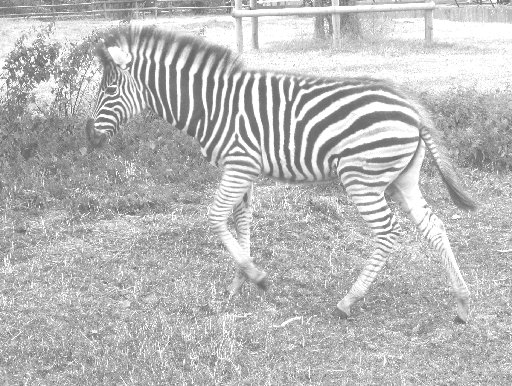

In [26]:
Image.fromarray(output_image, 'L') # after brightness

In [27]:
# Print image range
printImageRangeL(input_image, print_range, print_range)
printImageRangeL(output_image, print_range, print_range)



[  55  51  55  46  56  58  67  59  58  46  70 ]
[  44  54  62 101  75  66  54  55  71  61  53 ]
[  46  46  57  59  61  33  46  64  74  41  65 ]
[  50  42  44  56  54  52  58  70  65  54  58 ]
[  43  46  44  54  45  47  50  54  54  63  49 ]
[  46  45  55  54  42  52  49  52  50  49  51 ]
[  52  44  32  59  46  46  60  54  40  62  61 ]
[ 121 121 109 119 104  97 102  83  74  83  61 ]
[  66  73  52  46  47  49  48  47  54  49  48 ]
[  54  49  29  53  50  46  48  39  48  49  47 ]
[  29  40  44  52  44  38  40  46  42  44  44 ]


[ 135 131 135 126 136 138 147 139 138 126 150 ]
[ 124 134 142 181 155 146 134 135 151 141 133 ]
[ 126 126 137 139 141 113 126 144 154 121 145 ]
[ 130 122 124 136 134 132 138 150 145 134 138 ]
[ 123 126 124 134 125 127 130 134 134 143 129 ]
[ 126 125 135 134 122 132 129 132 130 129 131 ]
[ 132 124 112 139 126 126 140 134 120 142 141 ]
[ 201 201 189 199 184 177 182 163 154 163 141 ]
[ 146 153 132 126 127 129 128 127 134 129 128 ]
[ 134 129 109 133 130 126 128 119 12